# What is Semantic Search?
In this codelab you'll build a very basic semantic search model on a small dataset using the _embed_ function.

Read the accompanying blog post [here](https://txt.cohere.ai/what-is-semantic-search/)

In [1]:
# Install Cohere for embeddings, Umap to reduce embeddings to 2 dimensions,
# Altair for visualization, Annoy for approximate nearest neighbor search
!pip install cohere umap-learn altair annoy datasets tqdm
!pip install tiktoken
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.7/51.7 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 17.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 35.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 71.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.4 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=fde702d2f8dfa01bd0fc8a80555f0ca44d98e26f53dfd454726238e4ed3bc660
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
  

In [2]:
#@title Import libraries (Run this cell to execute required code) {display-mode: "form"}

import cohere
import numpy as np
import re
import pandas as pd
from tqdm import tqdm
from datasets import load_dataset
import umap
import altair as alt
from sklearn.metrics.pairwise import cosine_similarity
from annoy import AnnoyIndex
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', None)

In [3]:
# Paste your API key here. Remember to not share publicly
api_key = 'l55gb5H7PTfK7sPBvzjsPm42yjthrDNsLlN34MZq'

# Create and retrieve a Cohere API key from os.cohere.ai
co = cohere.Client(api_key)

# The dataset

In [4]:
qa_df = pd.DataFrame({'text':
  [
   'Where is the world cup?',
   'The world cup is in Qatar',
   'What color is the sky?',
   'The sky is blue',
   'Where does the bear live?',
   'The bear lives in the the woods',
   'What is an apple?',
   'An apple is a fruit',
  ]})

qa_df

,text
0,Where is the world cup?
1,The world cup is in Qatar
2,What color is the sky?
3,The sky is blue
4,Where does the bear live?
5,The bear lives in the the woods
6,What is an apple?
7,An apple is a fruit


# Creating the embedding

In [ ]:
#from cohere import embeddings
#qa = co.embed(texts=list(qa_df['text']), model='large', truncate='LEFT').embeddings

In [5]:
# A function that classifies a list of inputs given the examples
def embed_text(texts):
  """
  Turns a piece of text into embeddings
  Arguments:
    text(str): the text to be turned into embeddings
  Returns:
    embedding(list): the embeddings
  """
  # Embed text by calling the Embed endpoint
  output = co.embed(
                model="embed-english-v3.0",
                input_type="search_document",
                texts=texts)
  embedding = output.embeddings

  return embedding

In [6]:
qa = embed_text(texts=list(qa_df['text']))

# Plotting the embedding in 2D

In [7]:
# UMAP reduces the dimensions from 1024 to 2 dimensions that we can plot
reducer = umap.UMAP(n_neighbors=2)
umap_embeds = reducer.fit_transform(qa)
# Prepare the data to plot and interactive visualization
# using Altair
#df_explore = pd.DataFrame(data={'text': qa['text']})
#print(df_explore)

#df_explore = pd.DataFrame(data={'text': qa_df[0]})
df_explore = qa_df
df_explore['x'] = umap_embeds[:,0]
df_explore['y'] = umap_embeds[:,1]

# Plot
chart = alt.Chart(df_explore).mark_circle(size=60).encode(
    x=#'x',
    alt.X('x',
        scale=alt.Scale(zero=False)
    ),
    y=
    alt.Y('y',
        scale=alt.Scale(zero=False)
    ),
    tooltip=['text']
).properties(
    width=700,
    height=400
)
chart.interactive()

alt.Chart(...)

# Plotting the cosine similarities

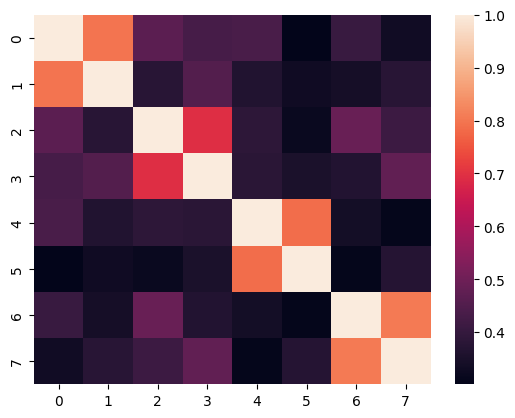

In [12]:
import seaborn as sb

def plot_similarities(data, embedding):
  similarities = []

  for i in range(len(data)):
    similarities.append([])
    for j in range(len(data)):
      #print(qa_df['text'][i], ',', qa_df['text'][j], '->', cosine_similarity(np.array([qa[i]]), np.array([qa[j]])))
      similarities[-1].append(cosine_similarity(np.array([embedding[i]]), np.array([embedding[j]])))
    #print()

  similarities = np.array(similarities).squeeze()
  #print(similarities)
  sb.heatmap(similarities)

plot_similarities(qa_df, qa)